In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
df = pd.read_csv('밀, 대두, 옥수수의 선물가격 정보 .csv', header=2)

In [88]:
df.head()

,date,wheat,corn,soybeans
0,20210623,243,216,480
1,20210622,239,259,512
2,20210621,243,259,519
3,20210620,0,0,0
4,20210619,0,0,0


In [89]:
df.sort_values(by='date', inplace=True)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7845 entries, 7844 to 0
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   date      7845 non-null   int64
 1   wheat     7845 non-null   int64
 2   corn      7845 non-null   int64
 3   soybeans  7845 non-null   int64
dtypes: int64(4)
memory usage: 306.4 KB


In [68]:
df.isna().sum()

date        0
wheat       0
corn        0
soybeans    0
year        0
dtype: int64

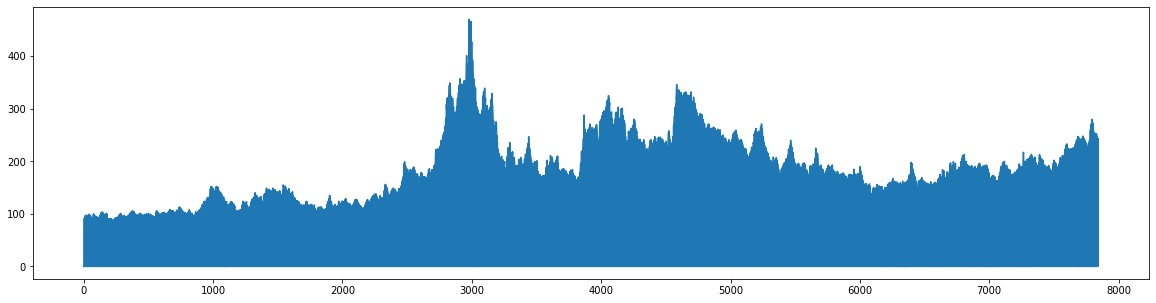

In [16]:
plt.figure(figsize=(20,5))
plt.plot(range(len(df.date)), df.wheat)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


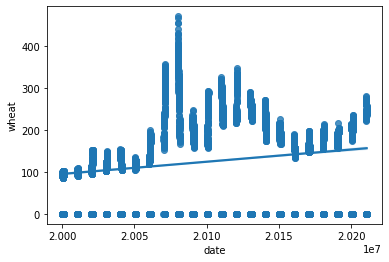

In [20]:
sns.regplot(df.date, df.wheat)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


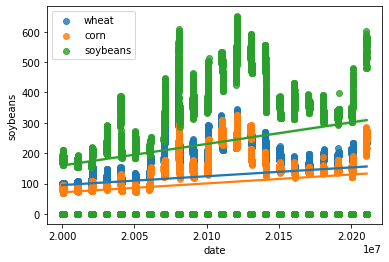

In [23]:
for col in df.columns[1:]:
    sns.regplot(df.date, df[col], label= col)
    plt.legend()

In [24]:
from statsmodels.api import OLS

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<Figure size 432x288 with 0 Axes>

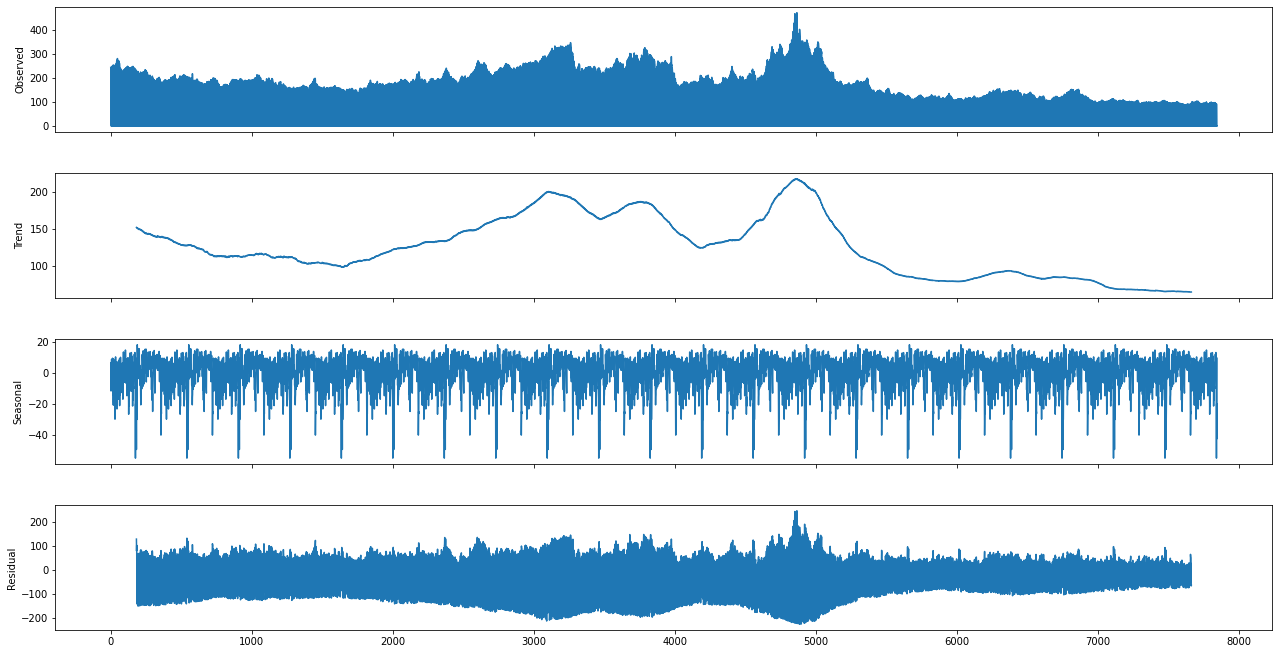

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df.wheat, model='addictive', freq=365)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20, 10)
plt.show()

In [33]:
seasonal_decompose()

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [36]:
df_cof = pd.read_csv('미국 커피 C 선물 내역.csv')
df_cof.head()

,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2022-05-06,210.13,215.93,216.47,210.03,-,-2.93%
1,2022-05-05,216.48,221.43,222.90,216.13,-,-1.96%
2,2022-05-04,220.80,218.30,221.75,217.90,14.53K,1.31%
3,2022-05-03,217.95,216.90,220.80,215.40,14.44K,0.73%
4,2022-05-02,216.38,220.45,220.70,214.75,-,-2.77%


In [37]:
df_cof_tmp = df_cof[['날짜', '종가']]
df_cof_tmp.isna().sum()

날짜    0
종가    0
dtype: int64

In [38]:
df_cof_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      1260 non-null   object 
 1   종가      1260 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.8+ KB


In [54]:
df_cof_tmp['날짜'] = pd.to_datetime(df_cof_tmp['날짜']).dt.strftime('%Y%m%d').astype(float)
df_cof_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      1260 non-null   float64
 1   종가      1260 non-null   float64
dtypes: float64(2)
memory usage: 19.8 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
df_cof_tmp.sort_values(by='날짜', inplace=True)
df_cof_tmp.head()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,날짜,종가
1259,20170509.0,132.80
1258,20170510.0,134.30
1257,20170511.0,131.90
1256,20170512.0,132.60
1255,20170515.0,131.25


<Figure size 432x288 with 0 Axes>

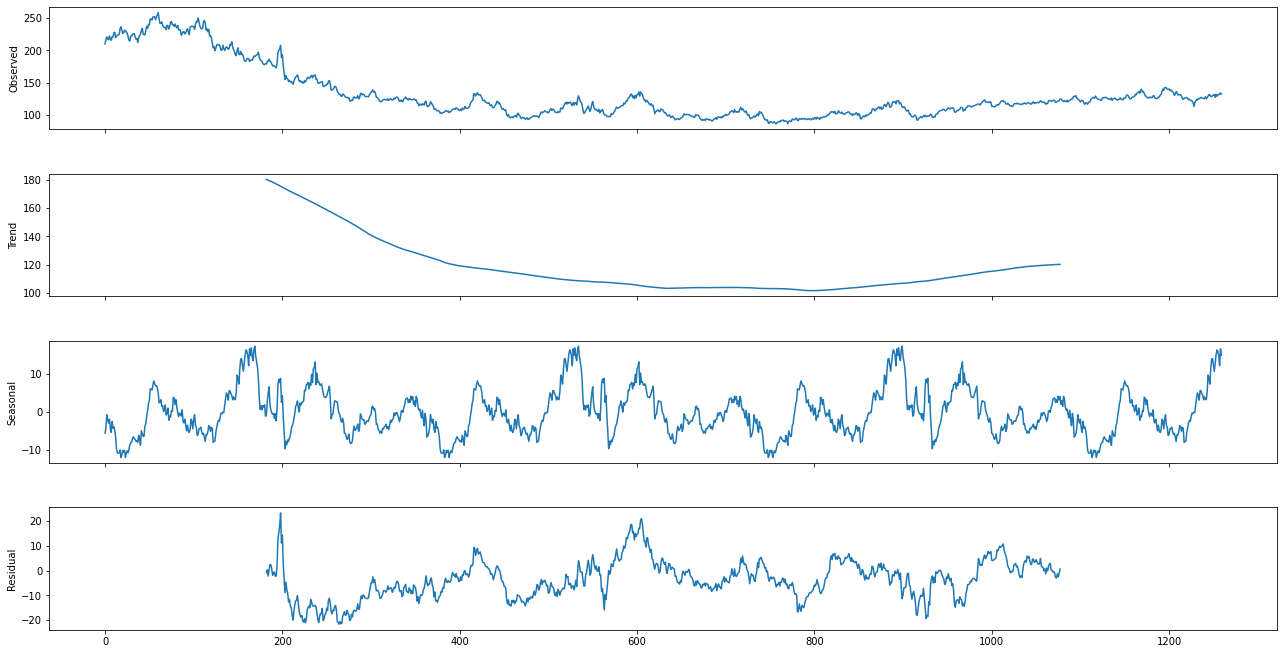

In [57]:
result = seasonal_decompose(df_cof_tmp['종가'], model='addictive', freq=365)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20, 10)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text

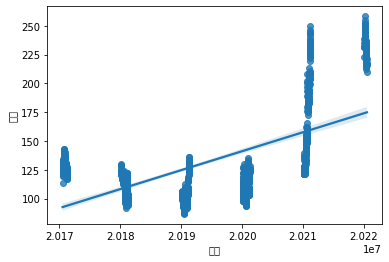

In [58]:
sns.regplot(df_cof_tmp['날짜'], df_cof_tmp['종가'])

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7845 entries, 7844 to 0
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   date      7845 non-null   int64
 1   wheat     7845 non-null   int64
 2   corn      7845 non-null   int64
 3   soybeans  7845 non-null   int64
dtypes: int64(4)
memory usage: 306.4 KB


In [95]:
# df1 = df.copy()
df = df[df.wheat != 0]
df = df[df.corn != 0]
df = df[df.soybeans != 0]

df['year'] = pd.to_datetime(df.date).dt.year
df.head()

,date,wheat,corn,soybeans,year
7842,20000103,90,79,167,1970
7841,20000104,90,79,170,1970
7840,20000105,91,79,172,1970
7839,20000106,91,80,171,1970
7838,20000107,92,81,173,1970


In [96]:
df.year = pd.to_datetime(df.date,format='%Y%m%d').dt.year
df.head()

,date,wheat,corn,soybeans,year
7842,20000103,90,79,167,2000
7841,20000104,90,79,170,2000
7840,20000105,91,79,172,2000
7839,20000106,91,80,171,2000
7838,20000107,92,81,173,2000


In [84]:
df_wh = df.groupby('year')[['wheat']].mean()

,wheat
year,
2000,94.107143
2001,99.506024
2002,118.565737
2003,122.533865
2004,126.575397
2005,116.674603
2006,147.493976
2007,233.450199
2008,290.927419


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


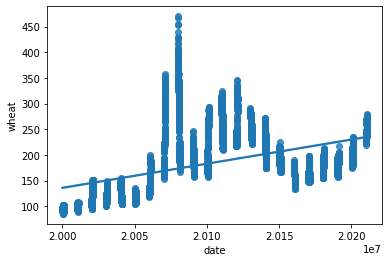

In [86]:
sns.regplot(df.date, df.wheat)

In [97]:
import statsmodels.api as sm
for col in df.columns[1:]:
    X_train = sm.add_constant(df.date)
    model = sm.OLS(df[col], df.date).fit()
    print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  wheat   R-squared (uncentered):                   0.894
Model:                            OLS   Adj. R-squared (uncentered):              0.894
Method:                 Least Squares   F-statistic:                          4.489e+04
Date:                Mon, 16 May 2022   Prob (F-statistic):                        0.00
Time:                        02:10:31   Log-Likelihood:                         -29671.
No. Observations:                5329   AIC:                                  5.934e+04
Df Residuals:                    5328   BIC:                                  5.935e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### 이익률 함수 !

In [150]:
df = pd.read_csv('밀, 대두, 옥수수의 선물가격 정보 .csv', header=2)
df.sort_values(by='date', inplace=True)
df = df[df.wheat != 0]
df = df[df.corn != 0]
df = df[df.soybeans != 0]
df['year'] = pd.to_datetime(df.date).dt.year

In [162]:
def profit_w_s_c(pred_year):
    pred_list = []
    for col in df.columns[1:-1] :
        df_tmp = df.groupby('year')[[col]].mean()
        X_train = sm.add_constant(df_tmp.index)
        model_wh = sm.OLS(df_tmp[col], df_tmp.index).fit()
        pred_list.append([col, round(float(model_wh.predict(pred_year)), 2)])
        # print(model_cof.summary())
    return pred_list


In [163]:
profit_w_s_c(2022)

[['wheat', 188.69], ['corn', 153.11], ['soybeans', 351.29]]

In [153]:
pd.to_datetime(df_cof_tmp['날짜'])

0      2017-05-09
1      2017-05-10
2      2017-05-11
3      2017-05-12
4      2017-05-15
          ...    
1255   2022-05-02
1256   2022-05-03
1257   2022-05-04
1258   2022-05-05
1259   2022-05-06
Name: 날짜, Length: 1260, dtype: datetime64[ns]

In [168]:
df_cof = pd.read_csv('미국 커피 C 선물 내역.csv')
df_cof = df_cof[['날짜', '종가']]
df_cof['날짜'] = pd.to_datetime(df_cof['날짜'])
df_cof['year'] = df_cof['날짜'].dt.year
df_cof = df_cof.sort_values(by=['날짜'], ascending=True)
df_cof.reset_index(drop=True, inplace=True)
df_cof

,날짜,종가,year
0,2017-05-09,132.80,2017
1,2017-05-10,134.30,2017
2,2017-05-11,131.90,2017
3,2017-05-12,132.60,2017
4,2017-05-15,131.25,2017
...,...,...,...
1255,2022-05-02,216.38,2022
1256,2022-05-03,217.95,2022
1257,2022-05-04,220.80,2022
1258,2022-05-05,216.48,2022


In [166]:
def profit_cof(pred_year):
    pred_list = []
    df_cof_tmp = df_cof.groupby('year')[['종가']].mean()
    df_cof_tmp = df_cof_tmp.reset_index(drop=False)
    X_train = sm.add_constant(df_cof_tmp['year'])
    model_cof = sm.OLS(df_cof_tmp['종가'], df_cof_tmp['year']).fit()
    pred_list.append(['종가', round(float(model_cof.predict(pred_year)), 2)])
    print(model_cof.summary())
    return pred_list

In [170]:
profit_cof(2500)

                                 OLS Regression Results                                
Dep. Variable:                     종가   R-squared (uncentered):                   0.908
Model:                            OLS   Adj. R-squared (uncentered):              0.889
Method:                 Least Squares   F-statistic:                              49.11
Date:                Mon, 16 May 2022   Prob (F-statistic):                    0.000912
Time:                        02:32:41   Log-Likelihood:                         -31.405
No. Observations:                   6   AIC:                                      64.81
Df Residuals:                       5   BIC:                                      64.60
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


[['종가', 176.09]]